<a href="https://www.kaggle.com/code/khangluu4903/minneasota-interstate-traffic-dataset?scriptVersionId=164303110" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
traffic = pd.read_csv('../input/metro-interstate-traffic-volume/Metro_Interstate_Traffic_Volume.csv')

# 1. Exploring the Data

In [2]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
# How many entries? How many variables does each entry has?
traffic.shape

(48204, 9)

In [4]:
traffic.describe(include = "all")

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
count,48204.000000,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204
unique,NaN,11,NaN,NaN,NaN,NaN,11,38,40575
top,NaN,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,19-05-2013 10:00
freq,NaN,7,NaN,NaN,NaN,NaN,15164,11665,6
mean,3259.818355,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN
std,1986.860670,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1193.000000,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN
50%,3380.000000,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN
75%,4933.000000,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN


In [5]:
# count unique values in holiday
traffic.holiday.value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [6]:
# renaming the columns 
new_cols_name = {'traffic_volume': 'traffic_volume','holiday':'holiday',
                 'temp':'temp_real_F','rain_1h':'rain_density',
                 'snow_1h':'snow_density',
                 'clouds_all':'clouds_cover', 'weather_main': 'weather',
                 'weather_description':'weather_description','date_time': 'date_time'}
traffic.rename(new_cols_name, axis = 1, inplace = True)

In [7]:
# convert the average temperature from kelvin to Fahrenheit, rounded to 0 decimal place
traffic.temp_real_F = round((((traffic.temp_real_F - 273.15) * (9/5)) + 32), 0)
# change cloud cover to percentage (between 0 and 1)
traffic.clouds_cover = traffic.clouds_cover /100
# checking that temperature and cloud cover values are updated
traffic.head()

,traffic_volume,holiday,temp_real_F,rain_density,snow_density,clouds_cover,weather,weather_description,date_time
0,5545,NaN,59.0,0.0,0.0,0.40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,61.0,0.0,0.0,0.75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,62.0,0.0,0.0,0.90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,63.0,0.0,0.0,0.90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,64.0,0.0,0.0,0.75,Clouds,broken clouds,02-10-2012 13:00


In [8]:
# Replace the None values, a NumPy built-in object, in holiday column to a different value that isn't a built-in type.
traffic.fillna('no_holiday', inplace = True)

# 2. Data Analysis
The data contains the traffic volume on I-94 and each observation has many interesting environmental variables like weather and holiday occurences. In this section, I will seek the answer to the following questions by working with the data sets.
1. What holidays have the most severe traffic volume?
2. What weathers have the most severe traffic volume?
3. Can temperature predicts traffic volume?

# 2.1 What holidays have the most severe traffic volume?

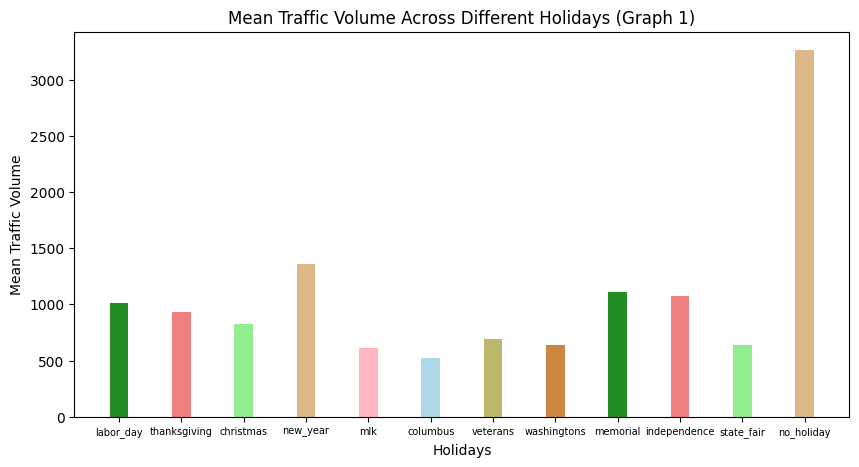

In [9]:
# 1. find the mean traffic_volume grouped by holiday
labor = traffic.loc[traffic['holiday'] == 'Labor Day', 'traffic_volume'].mean()
thanksgiving = traffic.loc[traffic['holiday'] == 'Thanksgiving Day', 'traffic_volume'].mean()
christmas = traffic.loc[traffic['holiday'] == 'Christmas Day', 'traffic_volume'].mean()
new_year = traffic.loc[traffic['holiday'] == 'New Years Day', 'traffic_volume'].mean()
mlk = traffic.loc[traffic['holiday'] == 'Martin Luther King Jr Day', 'traffic_volume'].mean()
columbus = traffic.loc[traffic['holiday'] == 'Columbus Day', 'traffic_volume'].mean()
veterans = traffic.loc[traffic['holiday'] == 'Veterans Day', 'traffic_volume'].mean()
washingtons = traffic.loc[traffic['holiday'] == 'Washingtons Birthday', 'traffic_volume'].mean()
memorial = traffic.loc[traffic['holiday'] == 'Memorial Day', 'traffic_volume'].mean()
independence = traffic.loc[traffic['holiday'] == 'Independence Day', 'traffic_volume'].mean()
state_fair = traffic.loc[traffic['holiday'] == 'State Fair', 'traffic_volume'].mean()
no_holiday = traffic.loc[traffic['holiday'] == 'no_holiday', 'traffic_volume'].mean()

# 2. Use matplotlib to make a bar graph of the means
data = {'labor_day': labor, 'thanksgiving': thanksgiving, 'christmas': christmas, 'new_year': new_year,
            'mlk': mlk, 'columbus': columbus, 'veterans' : veterans, 'washingtons' :washingtons,
            'memorial': memorial, 'independence': independence, 'state_fair': state_fair,
            'no_holiday': no_holiday}
holidays = list(data.keys())
traffic_v = list(data.values())
fig = plt.figure(figsize = (10,5))
color = {'lightblue', 'lightcoral', 'lightgreen', 'burlywood', 'darkkhaki','lightpink','forestgreen', 'peru'}
plt.bar(holidays, traffic_v, color = color, width = 0.3)
plt.xlabel('Holidays')
plt.xticks(fontsize=7)
plt.ylabel('Mean Traffic Volume')
plt.title("Mean Traffic Volume Across Different Holidays (Graph 1)")
plt.show()

In [10]:
# Getting the top 5 busiest holidays
sorted_holidays = sorted(data.items(), key = lambda x:x[1], reverse = True)
print(sorted_holidays)

[('no_holiday', 3262.852169578132), ('new_year', 1356.0), ('memorial', 1107.6), ('independence', 1076.0), ('labor_day', 1013.1428571428571), ('thanksgiving', 933.5), ('christmas', 827.5), ('veterans', 691.4), ('washingtons', 635.2), ('state_fair', 634.8), ('mlk', 612.6666666666666), ('columbus', 519.4)]


From Graph 1, the holidays with the highest traffic volume are:
1. No holiday
2. New Year
3. Memorial Day
4. Independence Day
5. Labor Day

The result was surprising and contradicted the common assumption that there is significantly more traffic volume during major US holidays because many people take advantage of the holidays to go on vacations or visit families. The data actually showed that non-holiday dates had more traffic volume. Perhaps, the data set is impacted by selection bias. There are over 48 thousand observations for non-holiday, whereas each holiday has at most 7 observations. 

# 2.2 What weathers have the most severe traffic volume?

In [11]:
# What are the unique values for weather?
traffic.weather.value_counts()

weather
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

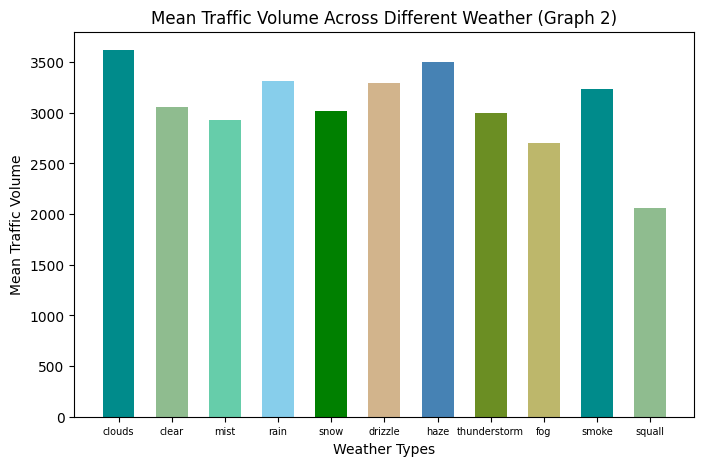

In [12]:
# 1. find the mean traffic_volume grouped by weather types
Clouds = traffic.loc[traffic['weather'] == 'Clouds', 'traffic_volume'].mean()
Clear  = traffic.loc[traffic['weather'] == 'Clear', 'traffic_volume'].mean()
Mist   = traffic.loc[traffic['weather'] == 'Mist', 'traffic_volume'].mean()
Rain   = traffic.loc[traffic['weather'] == 'Rain', 'traffic_volume'].mean()
Snow   = traffic.loc[traffic['weather'] == 'Snow', 'traffic_volume'].mean()
Drizzle = traffic.loc[traffic['weather'] == 'Drizzle', 'traffic_volume'].mean()
Haze    = traffic.loc[traffic['weather'] == 'Haze', 'traffic_volume'].mean()
Thunderstorm = traffic.loc[traffic['weather'] == 'Thunderstorm', 'traffic_volume'].mean()
Fog    = traffic.loc[traffic['weather'] == 'Fog', 'traffic_volume'].mean()
Smoke  = traffic.loc[traffic['weather'] == 'Smoke', 'traffic_volume'].mean()
Squall = traffic.loc[traffic['weather'] == 'Squall', 'traffic_volume'].mean()
weather_dict = {'clouds': Clouds, 'clear': Clear, 'mist': Mist, 'rain': Rain,
            'snow': Snow, 'drizzle': Drizzle, 'haze' : Haze, 'thunderstorm' : Thunderstorm,
            'fog': Fog, 'smoke': Smoke, 'squall': Squall}
weather = list(weather_dict.keys())
traffic_v = list(weather_dict.values())
fig = plt.figure(figsize = (8,5))
color = {'tan', 'darkkhaki','olivedrab', 'darkseagreen', 'green', 'mediumaquamarine','darkcyan','steelblue', 'skyblue'}
plt.bar(weather, traffic_v, color = color, width = 0.6)
plt.xlabel('Weather Types')
plt.xticks(fontsize= 7)
plt.ylabel('Mean Traffic Volume')
plt.title("Mean Traffic Volume Across Different Weather (Graph 2)")
plt.show()

In [13]:
# Getting the top 5 weather types with busiest traffic volume
sorted_weather = sorted(weather_dict.items(), key = lambda x:x[1], reverse = True)
print(sorted_weather)

[('clouds', 3618.449749406489), ('haze', 3502.1014705882353), ('rain', 3317.9055007052184), ('drizzle', 3290.727073036793), ('smoke', 3237.65), ('clear', 3055.908819356284), ('snow', 3016.844228094576), ('thunderstorm', 3001.6208897485494), ('mist', 2932.956638655462), ('fog', 2703.720394736842), ('squall', 2061.75)]


The data suggested that the weather types with the highest traffic volumes are Clouds, Haze, Rain, Drizzle, and Smoke. This is interesting because Clear weather did not make the top 5, even though argurably Clear weather is the best weather for driving condition over more hazardous ones like Rain and Smoke. Perhaps, this suggests that weather is not a significant predictor of traffic volume.

# 2.3 Can temperature predicts traffic volume? 
Using linear regression to predict traffic volume based on temperature.

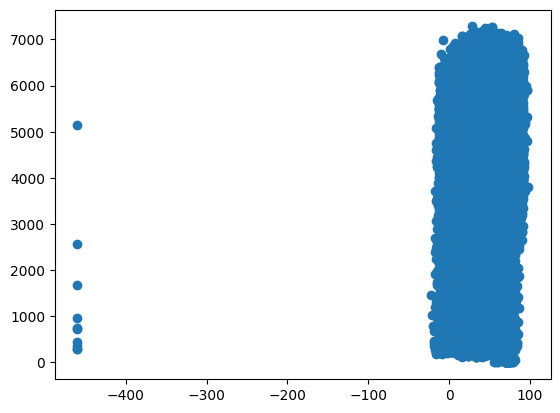

In [14]:
temp = list(traffic['temp_real_F'])
traffic_v = list(traffic['traffic_volume'])
plt.scatter(temp, traffic_v)

There are temperature data points less than -400 Fahrenheit, which is scientifically impossible and indicate mistakes in the data.
I will conduct data cleaning to remove these observations.


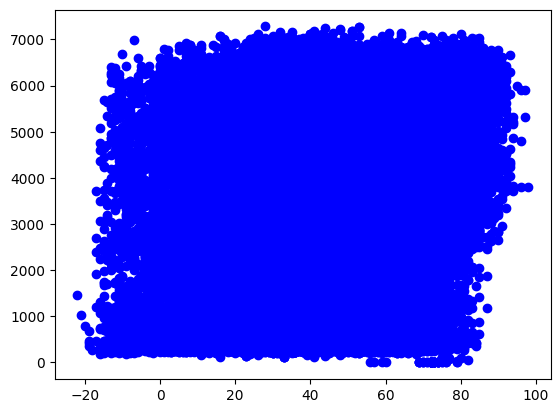

In [15]:
traffic_copy = traffic.copy()
# Use drop to remove rows where 'weather' is less than 100
index_to_drop = traffic_copy[traffic_copy['temp_real_F'] < -50].index
traffic_copy = traffic_copy.drop(index_to_drop).reset_index(drop=True)
temp = list(traffic_copy['temp_real_F'])
traffic_v = list(traffic_copy['traffic_volume'])
plt.scatter(temp, traffic_v, color = 'blue')

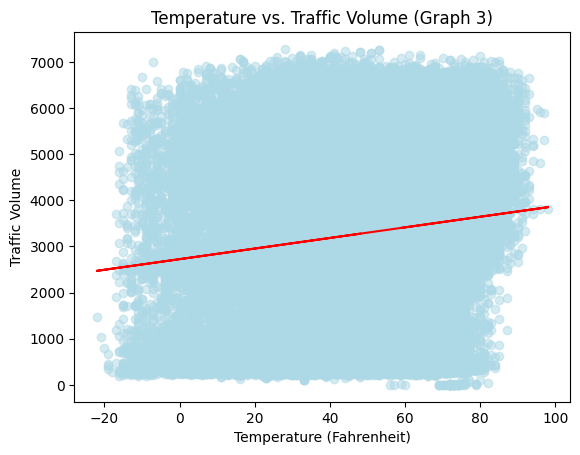

In [16]:
# Apply linear regression
slope, intercept, r, p, err = stats.linregress(temp, traffic_v)
def funct(x):
    return slope * x + intercept
linearmodel = list(map(funct,temp))
plt.scatter(temp, traffic_v, color = 'lightblue', alpha = 0.5)
# draw linear line
plt.plot(temp, linearmodel, color = 'red')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Traffic Volume')
plt.title("Temperature vs. Traffic Volume (Graph 3)")
plt.show()

In [17]:
# predict the traffic volume for a variety of temperature
# 75°F
print(funct(75))
# 80°F
print(funct(80))
# 85°F
print(funct(85))

3586.3610491709387
3643.7910077946653
3701.2209664183915


In [18]:
# how good is the model?
print(r * r)

0.0174996483246003


The R-squared value is 0.017, which means that the model predicts about 1.7% of the relationship between temperature and traffic volume. This means that linear regression is not a good fit to explore this relationship.

# 3. Conclusion

The data set Metro Interstate Traffic Volume contains hourly observations on the traffic volume and environmental measures on I-94 in Minnesota from 2012 to 2018. I first explored the data set by using functions like info and describe to get a better sense of the variables. Then, I used matplotlib to generate graphs for data visualization and explore the relationship between different variables, like holidays and traffic volume and weather and trafrfic volume. Finally, I applied linear regression to determine if a relationship exist between temperature and traffic volume.